# Data Preparation: Data Visualization

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use("seaborn-whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Line Plot

In [2]:
# example data
url = "https://raw.githubusercontent.com/Kanbc/ar-model-python/master/data/daily-minimum-temperatures.csv"
raw_df = pd.read_csv(url, 
                     header=0, 
                     index_col=0, 
                     parse_dates=True)
raw_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


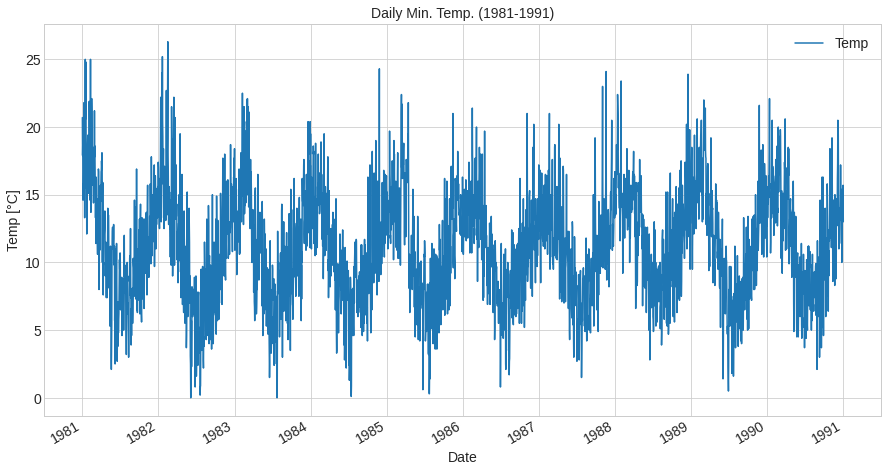

In [3]:
# plot entire data
raw_df.plot(figsize=(15,8))
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temp [°C]", fontsize=14)
plt.title("Daily Min. Temp. (1981-1991)", fontsize=14)
plt.show()

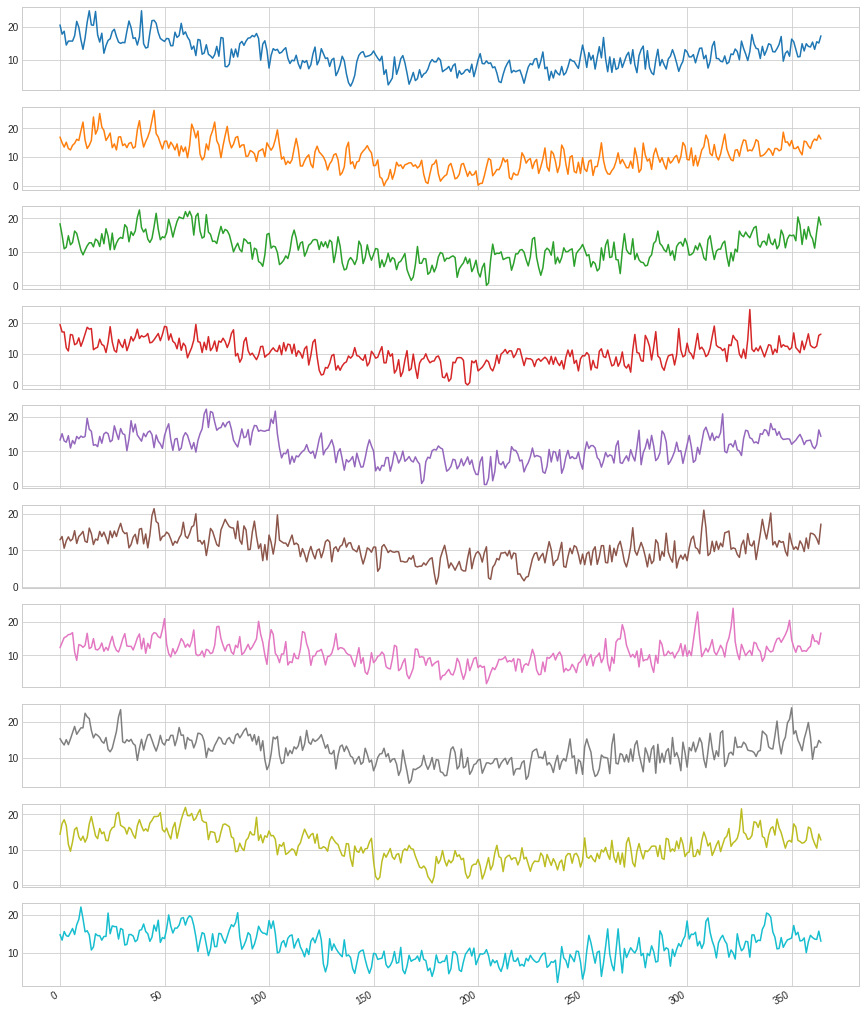

In [4]:
# seasonal plot (e.g. minimum daily temperature for 10 years)

# split data into yearly columns
groups = raw_df.groupby(pd.Grouper(freq="A"))
years = pd.DataFrame()
for last_date, date_group in groups:
  years[last_date.year] = np.array(date_group).reshape(-1)

# plot yearly data separately
years.plot(subplots=True, legend=False, figsize=(15,20))

plt.show()

## Histogram and Density Plot

Some linear time series forecasting methods assume normally distributed observations. We can check this by plotting histograms and density plot on raw observations and if required repeat this check on their transformed variant such as a log of original values.


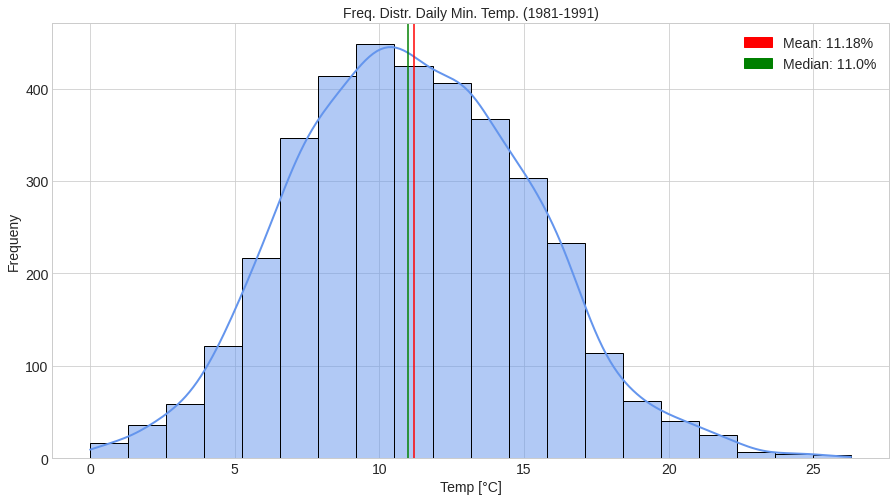

In [5]:
plt.figure(figsize=(15,8))

sns.histplot(data=raw_df, 
             x="Temp", 
             kde=True, 
             bins=20,
             color="cornflowerblue",
             line_kws={"linewidth": 2})

mean = raw_df["Temp"].mean()
median = raw_df["Temp"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: {}%".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: {}%".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Temp [°C]", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Daily Min. Temp. (1981-1991)", fontsize=14)

plt.show()

## Box and Whisker Plot

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot helps in detecting any outliers in the series.

In [6]:
# create separate columns for years and months
seasonal_df = raw_df.copy()
seasonal_df.reset_index(inplace=True)
seasonal_df["year"] = seasonal_df["Date"].dt.year
seasonal_df["month"] = seasonal_df["Date"].dt.month_name().str.slice(stop=3)
seasonal_df["day_of_year"] = seasonal_df["Date"].dt.dayofyear
seasonal_df = seasonal_df.reindex(columns=["Date", "year", "month", "day_of_year", "Temp"])
seasonal_df

,Date,year,month,day_of_year,Temp
0,1981-01-01,1981,Jan,1,20.7
1,1981-01-02,1981,Jan,2,17.9
2,1981-01-03,1981,Jan,3,18.8
3,1981-01-04,1981,Jan,4,14.6
4,1981-01-05,1981,Jan,5,15.8
...,...,...,...,...,...
3645,1990-12-27,1990,Dec,361,14.0
3646,1990-12-28,1990,Dec,362,13.6
3647,1990-12-29,1990,Dec,363,13.5
3648,1990-12-30,1990,Dec,364,15.7


In [7]:
def plot_seasonal_box_plots(df):

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6), sharey=True)

  sns.boxplot(x="year", y="Temp", data=df, color="lightblue", ax=axes[0])
  sns.boxplot(x="month", y="Temp", data=df, color="lightgreen", ax=axes[1])

  axes[0].set_title("Year-wise Box Plot (Trend)", fontsize=14)
  axes[0].set_xlabel("", fontsize=14)
  axes[0].set_ylabel("Temp [°C]", fontsize=14)
  plt.setp(axes[0].get_xticklabels(), fontsize=14)
  plt.setp(axes[0].get_yticklabels(), fontsize=14)

  axes[1].set_title("Month-wise Box Plot (Seasonaility)", fontsize=14)
  axes[1].set_xlabel("", fontsize=14)
  axes[1].set_ylabel("Temp [°C]", fontsize=14)
  plt.setp(axes[1].get_xticklabels(), fontsize=14)
  plt.setp(axes[1].get_yticklabels(), fontsize=14)

  plt.show()

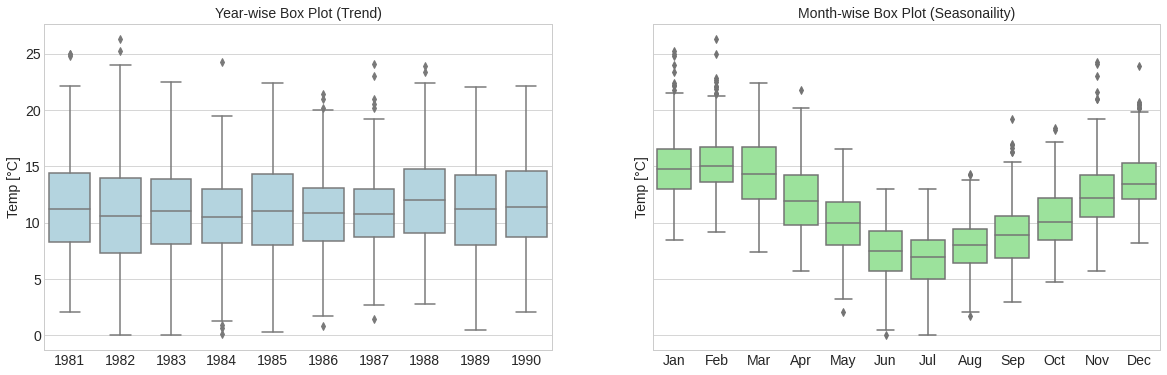

In [8]:
plot_seasonal_box_plots(seasonal_df)

## Heat Map

Use this to visualize the distribution of temperature in different colors. Its quite self-explanatory, larger values are displayed with warmer colors (yellow) and smaller values are displayed with cooler colors (green).

In [9]:
# split data into yearly columns
groups = raw_df.groupby(pd.Grouper(freq="A")) # group into years
years = pd.DataFrame() # new empty dataframe
for last_date, date_group in groups: # loop through years (all days of each year)
  years[last_date.year] = np.array(date_group).reshape(-1) # create column for current year and enter its day values
#years.T

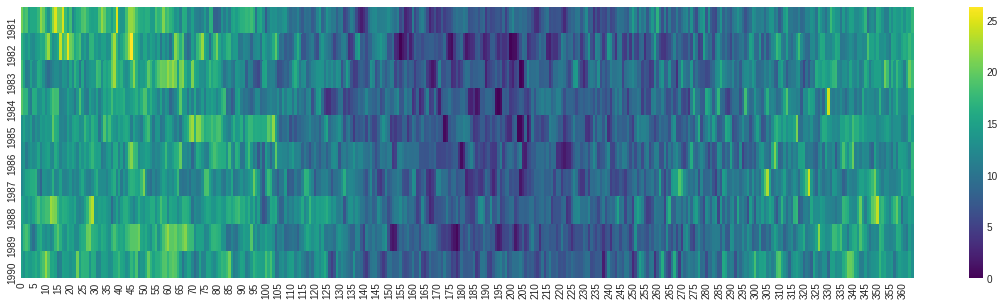

In [10]:
plt.figure(figsize=(20,5))
sns.heatmap(years.T, cmap="viridis")
plt.show()

## Lag Scatter Plot



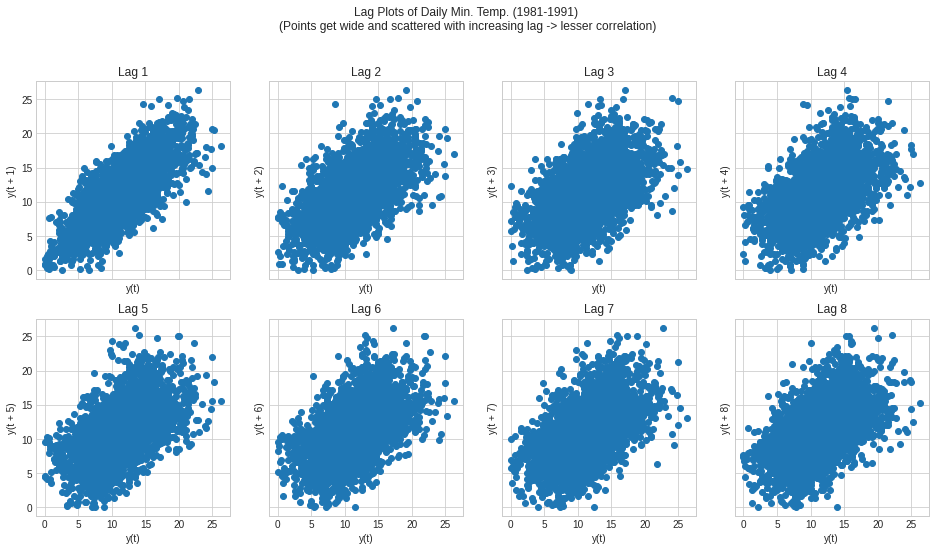

In [11]:
# create multiple lag scatter plots
fig, axes = plt.subplots(2, 4, figsize=(16,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()[:8]):
    lag_plot(raw_df["Temp"], lag=i+1, ax=ax)
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Daily Min. Temp. (1981-1991) \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.01)    
plt.show()

## Autocorrelation & Partial Autocorrelation

The strength of the correlation between observations and their lags can be quantified using the autocorrelation plot. In time series it is also called self-correlation, as we calculate correlation against lag values of the same series. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

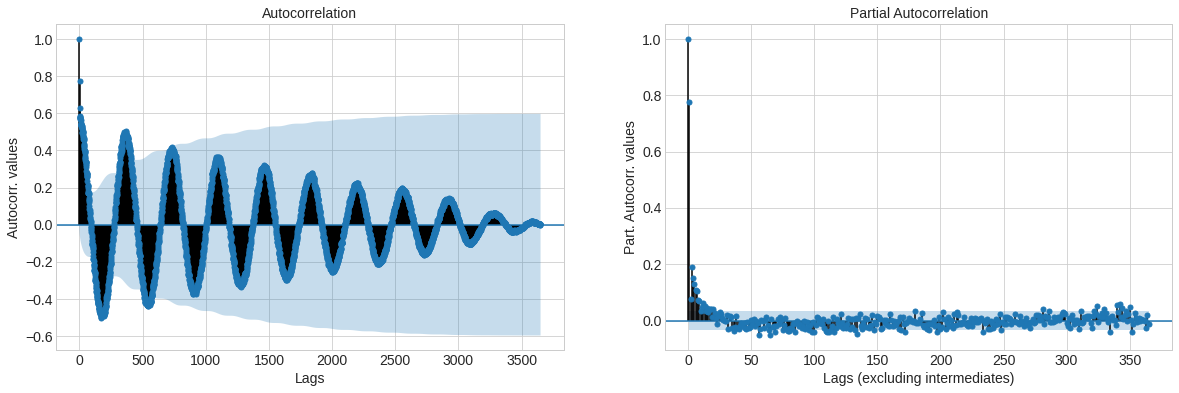

In [12]:
# plot autocorrelations & partial autocorrelation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))


plot_acf(raw_df["Temp"].tolist(), lags=raw_df.shape[0]-1, ax=axes[0])
axes[0].set_title("Autocorrelation", fontsize=14)
axes[0].set_xlabel('Lags', fontsize=14)
axes[0].set_ylabel('Autocorr. values', fontsize=14)
plt.setp(axes[0].get_xticklabels(), fontsize=14)
plt.setp(axes[0].get_yticklabels(), fontsize=14)

plot_pacf(raw_df["Temp"].tolist(), lags=365, ax=axes[1])
axes[1].set_title("Partial Autocorrelation", fontsize=14)
axes[1].set_xlabel('Lags (excluding intermediates)', fontsize=14)
axes[1].set_ylabel('Part. Autocorr. values', fontsize=14)
plt.setp(axes[1].get_xticklabels(), fontsize=14)
plt.setp(axes[1].get_yticklabels(), fontsize=14)

plt.show()